In [8]:
import util
import copy
import numpy as np
from matplotlib import pyplot as plt
from keep_default_optimizer import KeepDefaultOpt
from grid_search_optimizer import GridSearchOpt
import os
from tune_util import get_vacbo_optimizer
import pickle
#import lcb2bo
#from 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
opt_obj_arr_pdcbo.ndim

1

In [10]:
with open('./result/WO_contextual_min_19_07_39-Mar_31_2023.pkl', 'rb') as pickle_file:
#with open('./result/discomfort_constrained_energy_min_05_02_09-Nov_26_2022.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

obj_mean = -52.76428219620413
obj_std = 22.763438402688305
constr_1_std = 0.03 * 2
constr_2_std = 4e-4 * 20

opt_obj_list_pdcbo, \
constraints1_list_pdcbo, \
constraints2_list_pdcbo, \
evaluated_points_list_pdcbo,\
opt_obj_list_cbo,\
constraints1_list_cbo,\
constraints2_list_cbo,\
evaluated_points_list_cbo,\
opt_obj_list_safebo,\
constraints1_list_safebo,\
constraints2_list_safebo,\
evaluated_points_list_safebo = content


def get_cumu_mean_std(instant_arr):
    #if instant_arr.ndim == 1:
        
    cumu_arr = np.cumsum(instant_arr, axis=1)
    cumu_mean = np.mean(cumu_arr, axis=0)
    cumu_std = np.std(cumu_arr, axis=0)
    return cumu_mean, cumu_std

def get_avg_mean_std(instant_arr):
    num_traj, traj_len, _ = instant_arr.shape
    avg_arr = np.cumsum(instant_arr, axis=1)/np.expand_dims(np.arange(traj_len)+1, axis=1)
    avg_mean = np.mean(avg_arr, axis=0)
    avg_std = np.std(avg_arr, axis=0)
    return avg_mean, avg_std

opt_obj_arr_pdcbo = np.array(opt_obj_list_pdcbo) * obj_std + obj_mean
constraints1_arr_pdcbo = np.array(constraints1_list_pdcbo) * constr_1_std
constraints2_arr_pdcbo = np.array(constraints2_list_pdcbo) * constr_2_std 
cumu_opt_obj_mean_pdcbo, cumu_opt_obj_std_pdcbo = get_cumu_mean_std(opt_obj_arr_pdcbo)
cumu_constraints1_mean_pdcbo, cumu_constraints1_std_pdcbo = get_cumu_mean_std(constraints1_arr_pdcbo)
cumu_constraints2_mean_pdcbo, cumu_constraints2_std_pdcbo = get_cumu_mean_std(constraints2_arr_pdcbo)
avg_constraints1_mean_pdcbo, avg_constraints1_std_pdcbo = get_avg_mean_std(constraints1_arr_pdcbo)
avg_constraints2_mean_pdcbo, avg_constraints2_std_pdcbo = get_avg_mean_std(constraints2_arr_pdcbo)

opt_obj_arr_cbo = np.array(opt_obj_list_cbo) * obj_std + obj_mean
constraints1_arr_cbo = np.array(constraints1_list_cbo) * constr_1_std
constraints2_arr_cbo = np.array(constraints2_list_cbo) * constr_2_std
cumu_opt_obj_mean_cbo, cumu_opt_obj_std_cbo = get_cumu_mean_std(opt_obj_arr_cbo)
cumu_constraints1_mean_cbo, cumu_constraints1_std_cbo = get_cumu_mean_std(constraints1_arr_cbo)
cumu_constraints2_mean_cbo, cumu_constraints2_std_cbo = get_cumu_mean_std(constraints2_arr_cbo)
avg_constraints1_mean_cbo, avg_constraints1_std_cbo = get_avg_mean_std(constraints1_arr_cbo)
avg_constraints2_mean_cbo, avg_constraints2_std_cbo = get_avg_mean_std(constraints2_arr_cbo)

opt_obj_arr_safebo = np.array(opt_obj_list_safebo) * obj_std + obj_mean
constraints1_arr_safebo = np.array(constraints1_list_safebo) * constr_1_std
constraints2_arr_safebo = np.array(constraints2_list_safebo) * constr_2_std
cumu_opt_obj_mean_safebo, cumu_opt_obj_std_safebo = get_cumu_mean_std(opt_obj_arr_safebo)
cumu_constraints1_mean_safebo, cumu_constraints1_std_safebo = get_cumu_mean_std(constraints1_arr_safebo)
cumu_constraints2_mean_safebo, cumu_constraints2_std_safebo = get_cumu_mean_std(constraints2_arr_safebo)

avg_constraints1_mean_safebo, avg_constraints1_std_safebo = get_avg_mean_std(constraints1_arr_safebo)
avg_constraints2_mean_safebo, avg_constraints2_std_safebo = get_avg_mean_std(constraints2_arr_safebo)






In [11]:
avg_constraints1_mean_cbo.shape

(300, 1)

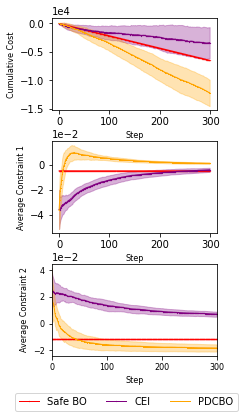

In [12]:
MARKERSIZE = 1.5 * 0.4 * 0.1
colors = ['red','purple', 'orange', 'green', 'blue', 'black', 'blue']
marksCur = ['o','s', '*', 'v', '^','+']
my_color = 'black' #'c'
from fig_hp import *
MS_ratio = 0.1

def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    y = np.squeeze(y)
    yerr = np.squeeze(yerr)
    aver_line,  = ax.plot(x, y,markersize=MARKERSIZE*MS_ratio, linewidth=LINEWIDTH, color=kwargs['color'], marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'])
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    return aver_line, aver_region

if True:
    total_steps = 300
    step_arr = np.arange(total_steps)
    
    %matplotlib inline
    #from matplotlib import rc
    #plt.rc('text',usetex=False)
   

    
    fig, axes = plt.subplots(3, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 3.3)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.33, wspace=0.4) 
   
    ax = axes[0]
    BETA1 = 1.0
    plot_with_shade_area(ax, step_arr, cumu_opt_obj_mean_safebo, BETA1*cumu_opt_obj_std_safebo,
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE*MS_ratio)
    plot_with_shade_area(ax, step_arr, cumu_opt_obj_mean_cbo, BETA1*cumu_opt_obj_std_cbo,
                         linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE*MS_ratio)
    plot_with_shade_area(ax, step_arr, cumu_opt_obj_mean_pdcbo, BETA1*cumu_opt_obj_std_pdcbo, 
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE*MS_ratio)
   
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.tick_params(axis='x', colors=my_color)
    ax.tick_params(axis='y', colors=my_color)
    ax.set_xlabel('Step', fontsize=LABELSIZE, color=my_color)
    ax.set_ylabel('Cumulative Cost', fontsize=LABELSIZE, color=my_color)  
    plt.xlim((0, total_steps))

    #ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
    
    ax = axes[1]

    #phi_line = ax.plot(con_bo_vio, linewidth=LINEWIDTH, color=colors[-1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    BETA2 = 1.0
    plot_with_shade_area(ax, step_arr, -avg_constraints1_mean_safebo, BETA2*avg_constraints1_std_safebo, 
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE*MS_ratio)
    plot_with_shade_area(ax, step_arr, avg_constraints1_mean_cbo, BETA2*avg_constraints1_std_cbo,
                        linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE*MS_ratio)
    plot_with_shade_area(ax, step_arr, avg_constraints1_mean_pdcbo, BETA2*avg_constraints1_std_pdcbo,
                        linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE*MS_ratio)
    #plot_with_shade_area(ax, step_arr, epbo_vio_1, BETA2*epbo_vio_sd_1,
    #                    linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None')
    
    plt.xlim((0, 300))
  
    plt.xticks(fontsize=LABELSIZE, color=my_color)
    plt.yticks(fontsize=LABELSIZE, color=my_color)
    ax.set_xlabel('Step', fontsize=LABELSIZE, color=my_color)
    ax.set_ylabel('Average Constraint 1', fontsize=LABELSIZE, color=my_color)
    
    
    ax = axes[2]

    #phi_line = ax.plot(con_bo_vio, linewidth=LINEWIDTH, color=colors[-1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    BETA2 = 1.0
    line_safe,_ =plot_with_shade_area(ax, step_arr, -avg_constraints2_mean_safebo, BETA2*avg_constraints2_std_safebo, 
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None')
    line_cbo,_ =plot_with_shade_area(ax, step_arr, avg_constraints2_mean_cbo, BETA2*avg_constraints2_std_cbo,
                        linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None')
    line_pdcbo,_ =plot_with_shade_area(ax, step_arr, avg_constraints2_mean_pdcbo, BETA2*avg_constraints2_std_pdcbo,
                        linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None')
    #plot_with_shade_area(ax, step_arr, epbo_vio_1, BETA2*epbo_vio_sd_1,
    #                    linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None')
    
    
    plt.xlim((0, 300))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

    plt.xticks(fontsize=LABELSIZE, color=my_color)
    plt.yticks(fontsize=LABELSIZE, color=my_color)
   

    ax.set_xlabel('Step', fontsize=LABELSIZE, color=my_color)
    ax.set_ylabel('Average Constraint 2', fontsize=LABELSIZE, color=my_color)
    ax.legend((line_safe, line_cbo, line_pdcbo), ('Safe BO', 'CEI', 'PDCBO'), loc='lower center', bbox_to_anchor=(0.2, -0.65, 0.5, 0.5),
             ncol=3)

    #ax.set_xscale('log')
    #ax.set_title('The Second Contextual Variable', fontsize=LABELSIZE)
    #ax.set_ylim(0, 0.2)
    #lgd = plt.legend(['', ''], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, prop={'size': LABELSIZE})
    #fig.set_size_inches(WIDTH, HEIGHT)

    #lgd = fig.legend((aver_line[0], adv_line[0]), ('Average', 'Adversarial'), 
    #                 loc='upper right', bbox_to_anchor=(0.78, 0.1), ncol=3, prop={'size': LABELSIZE})
    import tikzplotlib
    tikzplotlib.clean_figure()
    tikzplotlib.save('./fig/cumu_cost_avg_constrs.tex')

    plt.savefig('./fig/cumu_cost_avg_constrs.pdf', format='pdf', bbox_inches='tight')
    # plt.savefig(f'./fig/sample_funcs_r_and_v.pdf', format='pdf', bbox_inches='tight')
    plt.show()  
    
#plot_cumu_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
#                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists,
#                epbo_regret_lists_2, epbo_constrs_lists_2, epbo_regret_lists_3, epbo_constrs_lists_3)


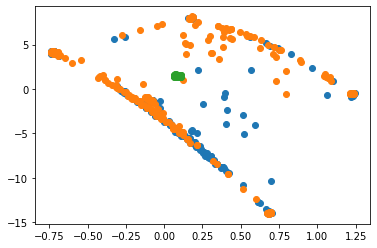

In [12]:
plt.scatter(constraints1_list_pdcbo, constraints2_list_pdcbo)
plt.scatter(constraints1_list_cbo, constraints2_list_cbo)
plt.scatter(constraints1_list_safebo, constraints2_list_safebo)axis=

In [13]:
config = util.get_config('WO')
g1 = config['constrs_list'][0]
g2 = config['constrs_list'][1]

avg_constraints_1_list_cbo = np.cumsum(constraints1_list_cbo)/(np.arange(len(constraints1_list_cbo))+1)
avg_constraints_1_list_pdcbo = np.cumsum(constraints1_list_pdcbo)/(np.arange(len(constraints1_list_pdcbo))+1)
avg_constraints_1_list_safebo = np.cumsum(constraints1_list_safebo)/(np.arange(len(constraints1_list_safebo))+1)

avg_constraints_2_list_cbo = np.cumsum(constraints2_list_cbo)/(np.arange(len(constraints2_list_cbo))+1)
avg_constraints_2_list_pdcbo = np.cumsum(constraints2_list_pdcbo)/(np.arange(len(constraints2_list_pdcbo))+1)
avg_constraints_2_list_safebo = np.cumsum(constraints2_list_safebo)/(np.arange(len(constraints2_list_safebo))+1)


[4.1, 81.2, 1043.38, 20.92, 79.23, 118.34]
6
[50, 50, 1, 1, 1, 1]


 <ipython-input-14-3b20241e0bda>:6: RuntimeWarning:divide by zero encountered in true_divide


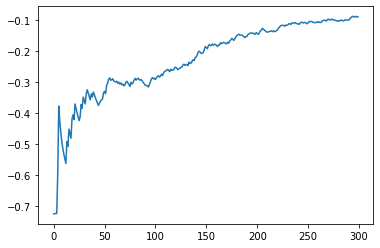

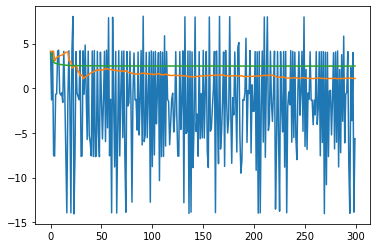

In [14]:
plt.plot(np.cumsum(constraints1_list_cbo)/(np.arange(len(constraints1_list_cbo))+1))
plt.figure()
plt.plot(constraints2_list_pdcbo)
plt.plot(np.cumsum(constraints2_list_cbo)/(np.arange(len(constraints2_list_cbo))+1))
#plt.figure()
plt.plot(np.cumsum(constraints2_list_safebo)/np.arange(len(constraints2_list_safebo))+1)

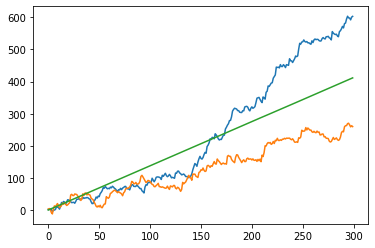

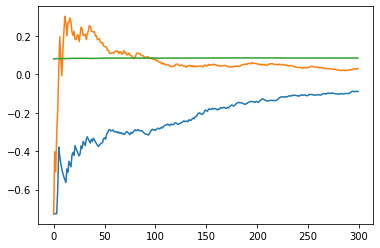

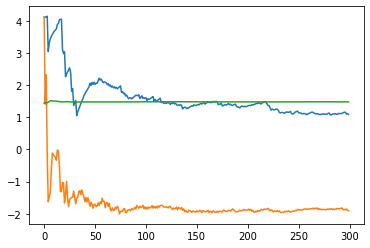

In [15]:
plt.plot(np.cumsum(opt_obj_list_cbo))

plt.plot(np.cumsum(opt_obj_list_pdcbo))
plt.plot(np.cumsum(opt_obj_list_safebo))
#plt.plot(np.cumsum(constraints2_list_cbo)/(np.arange(len(constraints2_list_cbo))+1))
plt.figure()
plt.plot(avg_constraints_1_list_cbo)
plt.plot(avg_constraints_1_list_pdcbo)
plt.plot(avg_constraints_1_list_safebo)

plt.figure()
plt.plot(avg_constraints_2_list_cbo)
plt.plot(avg_constraints_2_list_pdcbo)
plt.plot(avg_constraints_2_list_safebo)